In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\Heart_disease.csv")
df

,age,sex,chest_pain,rest_hp,cholestrol,fbs,restecg,thalach,exang,old_peak,slope,ca,thal,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   chest_pain     303 non-null    int64  
 3   rest_hp        303 non-null    int64  
 4   cholestrol     303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   old_peak       303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
print(df['ca'].unique())
print(df['ca'].value_counts())

['0' '3' '2' '1' '?']
ca
0    176
1     65
2     38
3     20
?      4
Name: count, dtype: int64


In [5]:
df['ca'] = df['ca'].replace('?', df['ca'].mode()[0])

In [6]:
print(df['thal'].unique())
print(df['thal'].value_counts())

['6' '3' '7' '?']
thal
3    166
7    117
6     18
?      2
Name: count, dtype: int64


In [7]:
df['thal']=df['thal'].replace('?',df['thal'].mode()[0])

In [8]:
df[['ca','thal']]=df[['ca','thal']].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   chest_pain     303 non-null    int64  
 3   rest_hp        303 non-null    int64  
 4   cholestrol     303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   old_peak       303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int32  
 12  thal           303 non-null    int32  
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 30.9 KB


In [10]:
print(df['heart_disease'].unique())
print(df['heart_disease'].value_counts())

[0 2 1 3 4]
heart_disease
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [11]:
df['heart_disease']=df['heart_disease'].apply(lambda x: 0 if x==0 else 1)

In [12]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='heart_disease',axis=1)
y=df['heart_disease']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
print(alphas)

[0.         0.00377596 0.00419551 0.00430952 0.00432662 0.00453115
 0.00587372 0.00587372 0.00629327 0.00660793 0.00704846 0.00704846
 0.00763583 0.00792952 0.00805538 0.00807064 0.0086049  0.00861265
 0.00881057 0.01426474 0.02456004 0.02727703 0.03216767 0.15753765]


In [15]:
param={'ccp_alpha':alphas}
gscv=GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=10)
gscv.fit(x_t,y_t)
print(gscv)
print(gscv.best_params_)
print(gscv.best_score_)
bestalpha=gscv.best_params_['ccp_alpha']

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00377596, 0.00419551, 0.00430952, 0.00432662,
       0.00453115, 0.00587372, 0.00587372, 0.00629327, 0.00660793,
       0.00704846, 0.00704846, 0.00763583, 0.00792952, 0.00805538,
       0.00807064, 0.0086049 , 0.00861265, 0.00881057, 0.01426474,
       0.02456004, 0.02727703, 0.03216767, 0.15753765])},
             scoring='accuracy')
{'ccp_alpha': 0.0062932662051604785}
0.7970355731225296


In [16]:
ndt=DecisionTreeClassifier(ccp_alpha=bestalpha)
param={
    'criterion':['gini','entropy'],
    'max_depth':list(np.arange(2,11)),
    'min_samples_split':list(np.arange(2,11)),
    'min_samples_leaf':list(np.arange(2,11)),
    'max_features':['auto','sqrt','log2'],}
ngscv=GridSearchCV(ndt,param_grid=param,scoring='accuracy',cv=10)
ngscv.fit(x_t,y_t)
print(ngscv.best_params_)
print(ngscv.best_score_)
ngscv=ngscv.best_estimator_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8}
0.8373517786561264


C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
14580 fits failed out of a total of 43740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14580 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

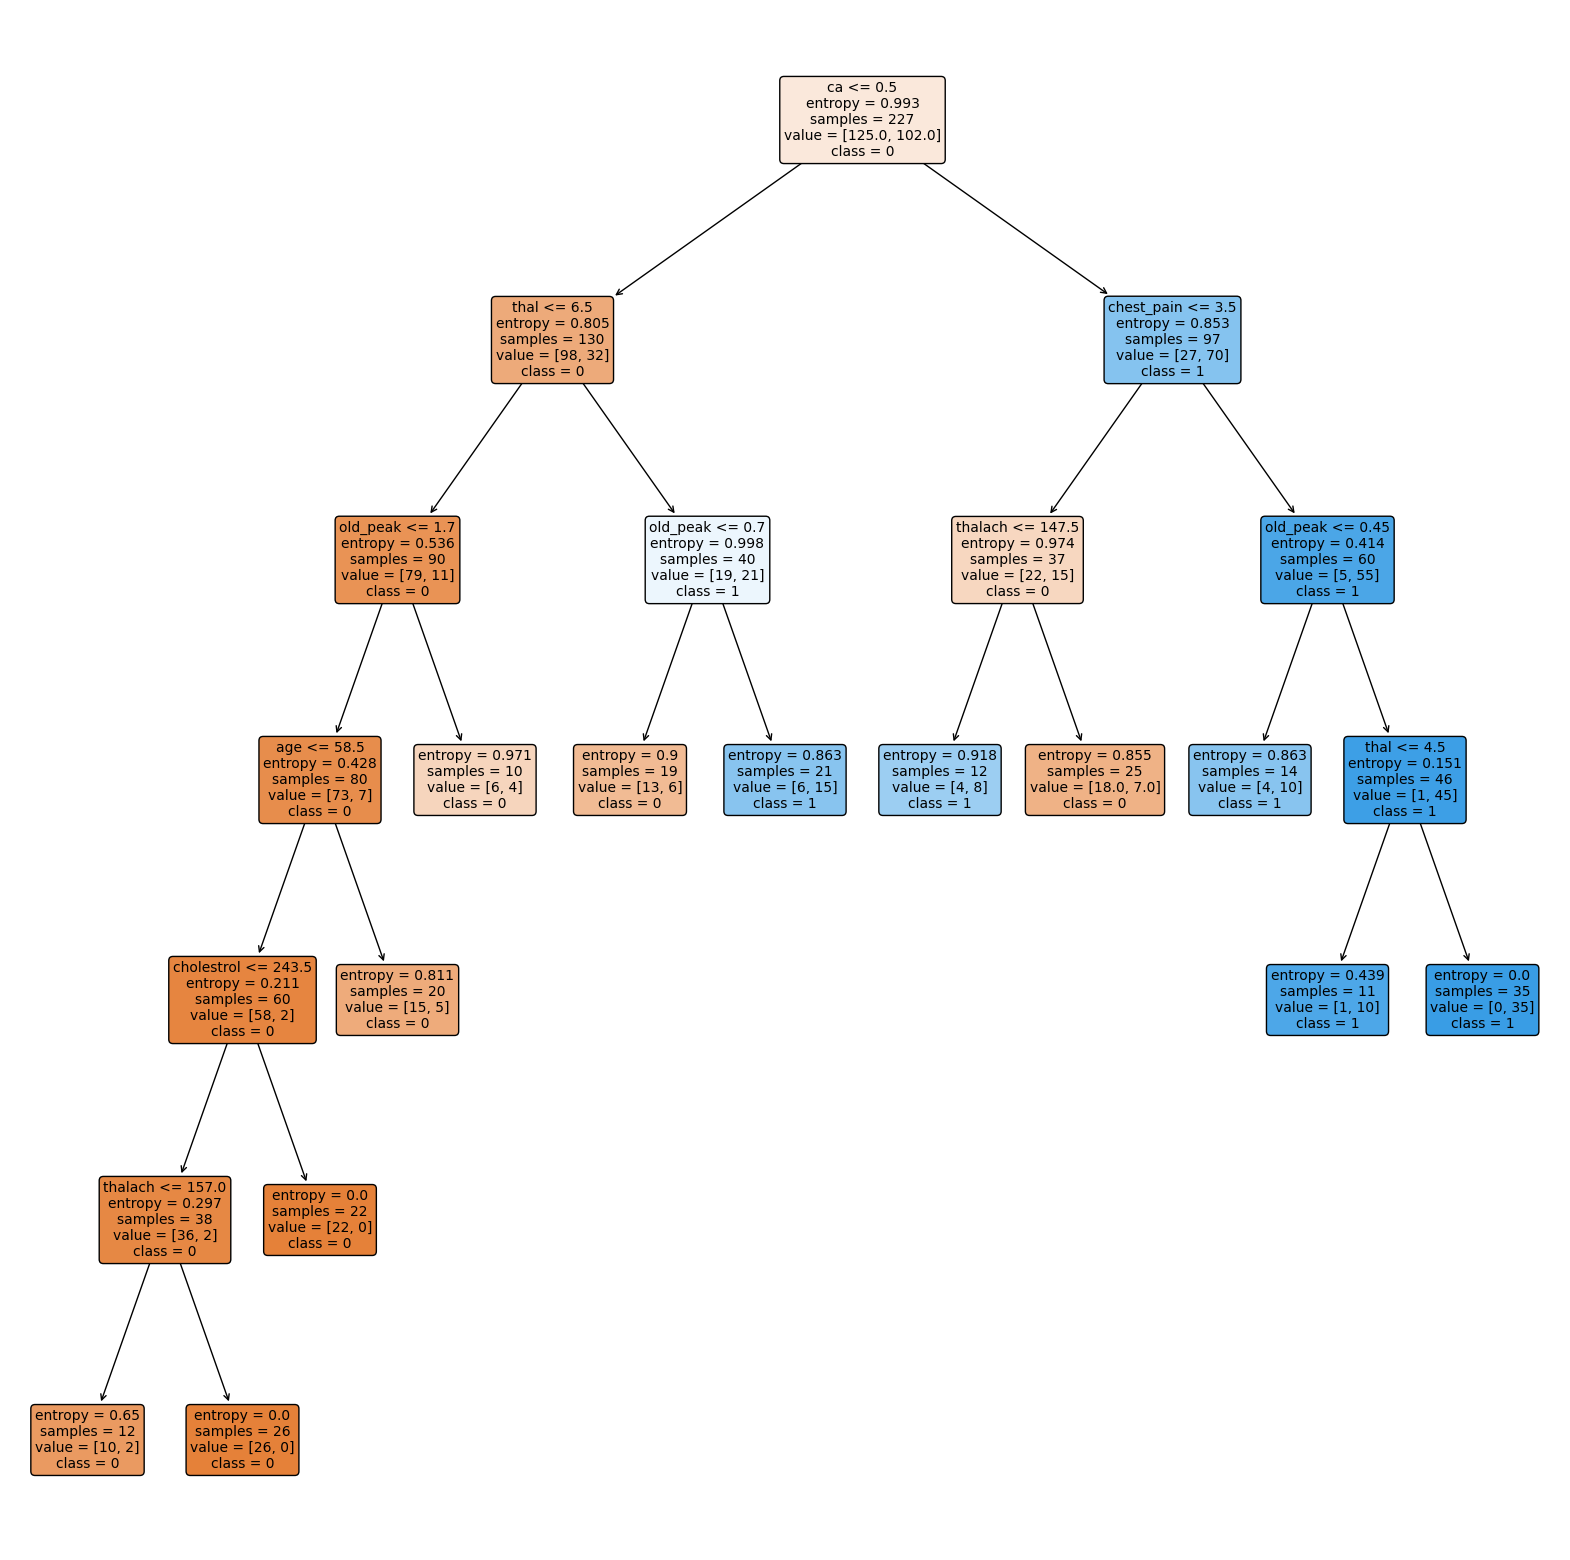

In [24]:
plt.figure(figsize=(20,20))
plot_tree(ngscv,filled=True, feature_names=x.columns,  
    class_names=ngscv.classes_.astype(str), rounded=True,
    fontsize=10)
plt.show()

In [25]:
pred=ngscv.predict(x_te)

In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cr=classification_report(y_te,pred)
a=accuracy_score(y_te,pred)
cm=confusion_matrix(y_te,pred)
print(cr,a)

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        39
           1       0.90      0.73      0.81        37

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76
 0.8289473684210527


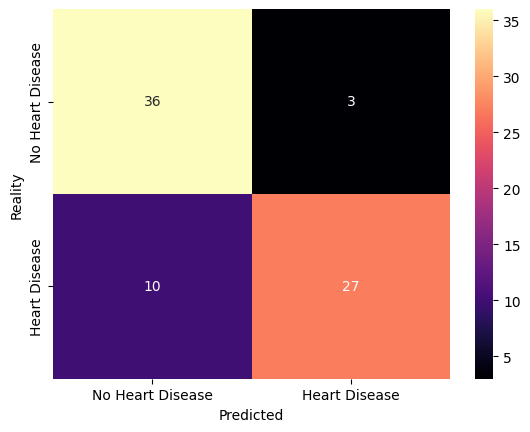

In [31]:
import seaborn as sns
class_names=['No Heart Disease','Heart Disease']
sns.heatmap(cm,annot=True,cmap='magma',xticklabels=class_names,yticklabels=class_names)
plt.ylabel("Reality")
plt.xlabel("Predicted")
plt.show()